In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.grid import Grid
import random
import multiprocessing
from ipywidgets import IntProgress
from IPython.display import display
%matplotlib inline

In [ ]:
# Load the data from the original file
df = pd.read_csv('consumption_ausgrid',skiprows=1)

# Drop the row quality column since it contains only nans
df = df.drop(columns=['Row Quality'])

In [ ]:
# Get index from first data point
df_temp = df.where(df['Customer'] == df['Customer'][0]).dropna()

def swap_date(date_string, time_string=''):
    """Function to give date in correct way for pd.date_range"""
    arr = date_string.split('/')
    tmp = arr[0]
    arr[0] = arr[2]
    arr[2] = tmp
    ret_string = '-'.join(arr)
    if time_string != '':
        ret_string = ret_string + ' ' + time_string
    return ret_string

# Set start and end date
start_date = swap_date(df_temp['date'].iloc[0])
end_date = swap_date(df_temp['date'].iloc[-1])
# Create DateIndex
idx = pd.date_range(start=start_date,end=end_date,freq='30T')

# Create empty pandas DataFrame
df_store = pd.DataFrame(index=idx)

In [ ]:
# List of customers unique
customers = np.unique(df['Customer'].values)

# List of all time keys
time_keys = ['0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00',
       '4:30', '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '8:30',
       '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30',
       '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30',
       '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30',
       '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '0:00']

# Loop through all customers
for num in customers:
    # Create empty column in store DataFrame
    df_store[str(num)] = np.zeros(df_store.shape[0])
for row in range(df.shape[0]):
    num = df['Customer'].iloc[row]
    # Check if row corresponds to consumption and not gross generation
    if df['Consumption Category'].iloc[row] == 'GG':
        continue
    # For each time point at that day
    for time_key in time_keys:
        # Create datetime obejct
        time = pd.Timestamp(swap_date(df['date'].iloc[row],time_key))
        try: # Finding the point in the storage 
            idx = df_store.index.get_loc(time)
        except: # If not found it might be day 30-06
            if time.day != 30:
                print('Could not find index for time: ' + str(time))
        df_store[str(num)].iloc[idx] += df[time_key].iloc[row]
df_store.to_csv(export_file)

In [ ]:
# Test import
df_cons = pd.read_csv(export_file)
df_cons['Unnamed: 0'] = pd.to_datetime(df_cons['Unnamed: 0'])
df_cons = df_cons.set_index('Unnamed: 0')

# Test import 
df_gen = pd.read_csv('data/generation_ausgrid.csv')
df_gen['Unnamed: 0'] = pd.to_datetime(df_gen['Unnamed: 0'])
df_gen = df_gen.set_index('Unnamed: 0')

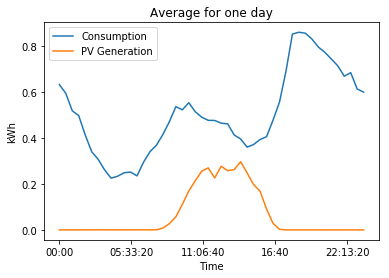

In [ ]:
# Plot average production for first day
avg_consum = df_cons.iloc[0:48,:].mean(axis=1)
avg_gen = df_gen.iloc[0:48,:].mean(axis=1)
time_consum = pd.Series(avg_consum.index)
for i in range(time_consum.shape[0]): time_consum[i] = time_consum[i].time()
time_gen = pd.Series(avg_gen.index)
for i in range(time_gen.shape[0]): time_gen[i] = time_gen[i].time()
plt.xlabel('Time')
plt.ylabel('kWh')
plt.plot(time_consum,avg_consum,label='Consumption')
plt.plot(time_gen,avg_gen,label='PV Generation')
plt.title('Average for one day')
plt.legend()
plt.savefig('test.png',dpi=200)
plt.show()

In [ ]:
# Load the data from the original file
df = pd.read_csv('generation_ausgrid',skiprows=1)

# Drop the row quality column since it contains only nans
df = df.drop(columns=['Row Quality'])

In [ ]:
# Get index from first data point
df_temp = df.where(df['Customer'] == df['Customer'][0]).dropna()

def swap_date(date_string, time_string=''):
    """Function to give date in correct way for pd.date_range"""
    arr = date_string.split('/')
    tmp = arr[0]
    arr[0] = arr[2]
    arr[2] = tmp
    ret_string = '-'.join(arr)
    if time_string != '':
        ret_string = ret_string + ' ' + time_string
    return ret_string

# Set start and end date
start_date = swap_date(df_temp['date'].iloc[0])
end_date = swap_date(df_temp['date'].iloc[-1])
# Create DateIndex
idx = pd.date_range(start=start_date,end=end_date,freq='30T')

# Create empty pandas DataFrame
df_store = pd.DataFrame(index=idx)

In [ ]:
# List of customers unique
customers = np.unique(df['Customer'].values)

# List of all time keys
time_keys = ['0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00',
       '4:30', '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '8:30',
       '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30',
       '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30',
       '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30',
       '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '0:00']

# Loop through all customers
for num in customers:
    # Create empty column in store DataFrame
    df_store[str(num)] = np.zeros(df_store.shape[0])
for row in range(df.shape[0]):
    num = df['Customer'].iloc[row]
    # Check if row corresponds to generation and not consumption
    if df['Consumption Category'].iloc[row] != 'GG':
        continue
    # For each time point at that day
    for time_key in time_keys:
        # Create datetime obejct
        time = pd.Timestamp(swap_date(df['date'].iloc[row],time_key))
        try: # Finding the point in the storage 
            idx = df_store.index.get_loc(time)
        except: # If not found it might be day 30-06
            if time.day != 30:
                print('Could not find index for time: ' + str(time))
        df_store[str(num)].iloc[idx] += df[time_key].iloc[row]
df_store.to_csv(export_file)

In [ ]:
# Test import
df = pd.read_csv(export_file)
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Unnamed: 0')

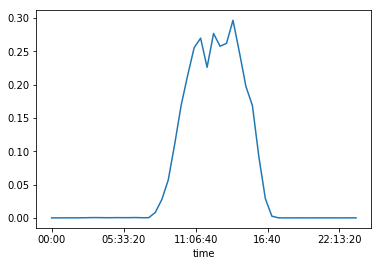

In [ ]:
# Plot average production for first day
avg_prod = df.iloc[0:48,:].mean(axis=1)
time = pd.Series(avg_prod.index)
for i in range(time.shape[0]): time[i] = time[i].time()
plt.plot(time,avg_prod)

This file reads the generation data from the previously generated dataset containing all the generation data in the AUSGRID (should be stored in data/generation_ausgrid.csv). It then chooses one PV setup as a reference system ( with know size) and scales its production to different sizes ( e.g. in steps of 0.25kWp). Since we want to optimize the distribution of PV modules in a neighborhood, we assume that the generation from the PV has the same characteristics for houses close by (this also assumes same kind of roofs, which is ideally, but sufficient enough for this project).

In [ ]:
df = pd.read_csv('generation_ausgrid')
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Unnamed: 0')
df.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2012-07-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


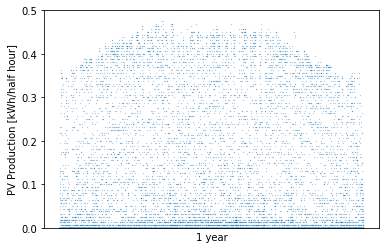

In [ ]:
# Choose customer 3 as it has a 1kWp module installed
data_1kwp = df['3'].values
plt.xlabel('1 year')
plt.ylabel('PV Production [kWh/half hour]')
plt.xticks([])
plt.ylim(0,0.5)
plt.scatter(np.arange(len(data_1kwp)),data_1kwp,s=0.02)

In [ ]:
# Define range of possible sizes of pv modules
poss_sizes = np.arange(0.25,10.25,0.25)

# Create new dataframe
df_store = pd.DataFrame(index=df.index)
for size in poss_sizes:
    df_store[str(size)] = size*data_1kwp

df_store.to_csv(export_file)

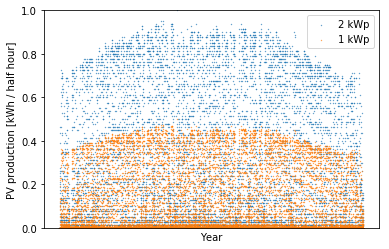

In [ ]:
# Plot two different sizes
df_store.keys()
plt.xticks([])
plt.ylim(0,1)
plt.ylabel('PV production [kWh / half hour]')
plt.xlabel('Year')
plt.scatter(np.arange(df_store.shape[0]),df_store['2.0'],s=0.1,label='2 kWp')
plt.scatter(np.arange(df_store.shape[0]),df_store['1.0'],s=0.1, label='1 kWp')

plt.legend()

# Visualisation

In [2]:
# Consumption data
df_cons = pd.read_csv('data/consumption_ausgrid.csv')
df_cons['Unnamed: 0'] = pd.to_datetime(df_cons['Unnamed: 0'])
df_cons = df_cons.set_index('Unnamed: 0')
df_cons_red = df_cons.iloc[:,0]
# Production data
df_prod = pd.read_csv('data/generation_ausgrid.csv')
df_prod['Unnamed: 0'] = pd.to_datetime(df_prod['Unnamed: 0'])
df_prod = df_prod.set_index('Unnamed: 0')

## Average day

Showing the daily consumption/prodcuction averaged over the whole year

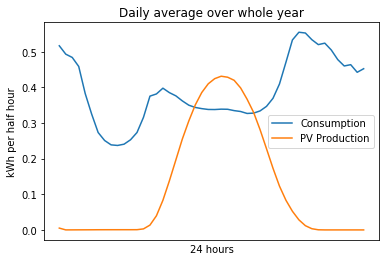

In [3]:
# Average over all days of the year
num_days = 365
avg_cons = np.zeros(48)
avg_prod = np.zeros(48)
for i in range(num_days):
    avg_cons += np.mean(df_cons.iloc[48*i:48*(i+1),:].values,axis=1)
    avg_prod += np.mean(df_prod.iloc[48*i:48*(i+1),:].values,axis=1)
avg_cons /= num_days
avg_prod /= num_days
plt.plot(avg_cons, label='Consumption')
plt.plot(avg_prod,label='PV Production')
plt.title('Daily average over whole year')
plt.xlabel('24 hours')
plt.xticks([])
plt.ylabel('kWh per half hour')
plt.legend()
plt.savefig('plots/daily_average.png',dpi=200)
#plt.close()

## Yearly production and consumption


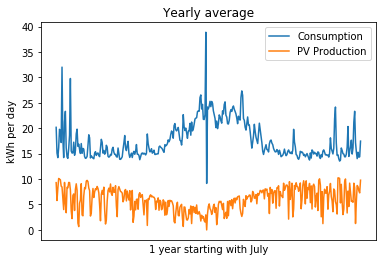

In [4]:
year_cons = df_cons.groupby([df_cons.index.month,df_cons.index.day]).sum()
year_cons_avg = np.mean(year_cons.values,axis=1)
year_prod = df_prod.groupby([df_prod.index.month,df_prod.index.day]).sum()
year_prod_avg = np.mean(year_prod.values,axis=1)
plt.plot(year_cons_avg, label='Consumption')
plt.plot(year_prod_avg, label='PV Production')
plt.xticks([])
plt.xlabel('1 year starting with July')
plt.legend(loc=1)
plt.ylabel('kWh per day')
plt.title('Yearly average')
plt.savefig('plots/yearly_average.png',dpi=200)
#plt.close()

## House selection

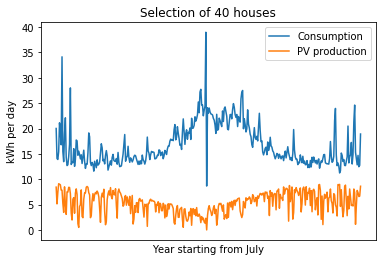

In [13]:
used_houses = [24, 30, 28, 8, 3, 33, 5, 21, 39, 11, 15, 17, 2, 36, 38, 6, 25, 16, 1, 32, 13, 10, 29, 20, 19, 22, 26, 18, 27, 14, 9, 31, 12, 0, 23, 37, 34, 4, 7, 35]
year_cons_houses = np.mean(year_cons.iloc[:,used_houses].values,axis=1)
year_prod_houses = np.mean(year_prod.iloc[:,used_houses].values,axis=1)

plt.plot(year_cons_houses,label='Consumption')
plt.plot(year_prod_houses,label='PV production')
plt.legend()
plt.ylabel('kWh per day')
plt.xlabel('Year starting from July')
plt.xticks([])
plt.title('Selection of 40 houses')
plt.show()

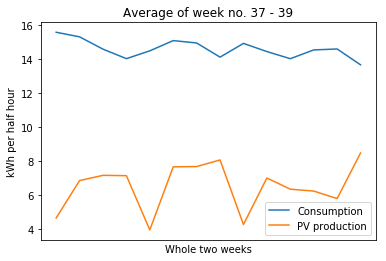

In [12]:
num_week = 37
num_week2 = num_week+2
avg_cons_week = year_cons_houses[7*num_week:7*(num_week2)]
avg_prod_week = year_prod_houses[7*num_week:7*(num_week2)]

plt.plot(avg_cons_week, label='Consumption')
plt.plot(avg_prod_week, label='PV production')
plt.xlabel('Whole two weeks')
plt.xticks([])
plt.ylabel('kWh per half hour')
plt.legend()
plt.title('Average of week no. ' + str(num_week) + ' - ' + str(num_week2))
plt.show()

Plot now again the whole year and mark the two weeks, that we selected above.

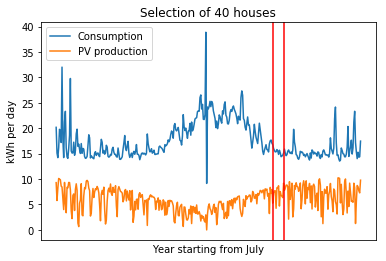

In [19]:
plt.plot(year_cons_avg,label='Consumption')
plt.plot(year_prod_avg,label='PV production')
plt.axvline(7*num_week,c='r')
plt.axvline(7*num_week2,c='r')
plt.legend()
plt.ylabel('kWh per day')
plt.xlabel('Year starting from July')
plt.xticks([])
plt.title('Selection of 40 houses')
plt.savefig('plots/yearly_average.png',dpi=200)


## Storage optimization
Optimization of the storage system, including connections between houses and batteries and their capacities.

In [ ]:
# Consumption data
df_cons['Unnamed: 0'] = pd.to_datetime(df_cons['Unnamed: 0'])
df_cons = df_cons.set_index('Unnamed: 0')
df_cons_red = df_cons.iloc[:,0]
# Production data
df_prod = pd.read_csv('data/generation_ausgrid.csv')
df_prod['Unnamed: 0'] = pd.to_datetime(df_prod['Unnamed: 0'])
df_prod = df_prod.set_index('Unnamed: 0')

# Choose specific houses and time frame
used_houses = [24, 30, 28, 8, 3, 33, 5, 21, 39, 11, 15, 17, 2, 36, 38, 6, 25, 16, 1, 32, 13, 10, 29, 20, 19, 22, 26, 18, 27, 14, 9, 31, 12, 0, 23, 37, 34, 4, 7, 35]

week_start = 37
week_end = 39
df_cons = df_cons.iloc[7*48*week_start:7*48*week_end,used_houses]
df_prod = df_prod.iloc[7*48*week_start:7*48*week_end,used_houses]

data_cons = df_cons.values
data_prod = df_prod.values

Now we can build the grid model. Since we only simulate 2 weeks, we need to set the costs accordingly. Therfore we define the timeframe after which the storages should pay off (i.e. 10 years) and calculate its investition cost for two weeks. 

In [ ]:
# Create grid model
g = Grid(num_houses=df_cons.shape[1],
         num_storages=df_cons.shape[1],
         max_capacity=0,
         num_pvtypes=df_prod.shape[1],
         pv_peakpower=0)
# Add each pv type to each house
for i in range(df_cons.shape[1]):
    g.change_pvtype(num_house=i,pv_type=i)
    g.change_storage_connection(num_house=i,storage_connection=i)

# Set the costs for 2 weeks
amortization_timeframe = 7*365 # in days
storage_cost_per_kWh = 500
storage_cost_per_kWh_per_day = storage_cost_per_kWh / amortization_timeframe
cost_per_wire = 0 # Assume wires are already there
loss_per_unit = 0.05 # 5% of power lost, when transferring to direct neighbor
g.set_costs(cost_storage_kwh=14*storage_cost_per_kWh_per_day,loss_per_unit=loss_per_unit)
g_initial = g.get_copy()
# Simulate the grid
res_dict_wo_storage = g.simulate(data_cons=data_cons,data_prod=data_prod)
print(res_dict_wo_storage)

{'import_grid_kwh': 6358.398999999978, 'export_grid_kwh': 1764.070999999992, 'pv_production_kwh': 3481.3379999999825, 'setup_cost_storage': 0.0, 'setup_cost_pv': 0.0, 'cost_import_grid': 1589.5997499999944, 'reward_export_grid': 176.40709999999922}


In [ ]:
def objective_function(res_dict):
    return res_dict['cost_import_grid'] + res_dict['setup_cost_storage'] - res_dict['reward_export_grid']

# Calculate the cost of the above simulation
cost_wo_storage = objective_function(res_dict_wo_storage)
print('Cost without storage: ' + str(cost_wo_storage))

Cost without storage: 1413.1926499999952


In [ ]:
# Capacities to simulate
caps = np.linspace(0,5,20,dtype=float)
min_cost_all_storages = 0
opt_caps = np.zeros(data_cons.shape[1]) #optimal capacities for each house
for i in range(data_cons.shape[1]):
    g_single = Grid(num_houses=1,num_storages=1,max_capacity=0,num_pvtypes=1,pv_peakpower=0)
    g_single.set_costs(cost_storage_kwh=14*storage_cost_per_kWh_per_day,loss_per_unit=loss_per_unit)
    g_single.change_pvtype(num_house=0,pv_type=0)
    g_single.change_storage_connection(num_house=0,storage_connection=0)
    costs = np.array([])
    for cap in caps:
        g_single.change_storages(num_storages=1,max_capacity=cap)
        costs = np.append(costs,objective_function(g_single.simulate(data_cons[:,i],data_prod[:,i])))
    min_cost_all_storages += np.min(costs)
    opt_caps[i] = caps[np.argmin(costs)]
    
# Create copy for later population initialization
g_all_storages = g.get_copy()
g_all_storages.change_storages(num_storages=data_cons.shape[1],max_capacity=opt_caps)
for i in range(data_cons.shape[1]):
    g_all_storages.change_storage_connection(num_house=i,storage_connection=i)
    
# print minimum
print('Min costs with own storage:' + str(min_cost_all_storages))

Min costs with own storage:1411.420079560202


Now we observe the other boundary case in which we only have one storage. So there is maximum sharing, but also a maximum loss in the connections to the storage.

Min cost with one storage: 1416.0781499999953


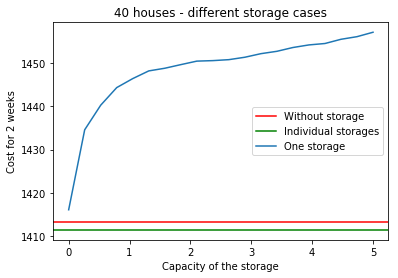

In [ ]:
# Create grid with all and with one storage
g.change_storages(num_storages=1,max_capacity=0)
caps = np.linspace(0,5,20)
costs = np.array([])

for cap in caps:
    g.change_storages(num_storages=1,max_capacity=cap)
    costs = np.append(costs,objective_function(g.simulate(data_cons,data_prod)))
min_cost_one_storage = np.min(costs)
# Copy grid for later population initialization
g_one_storage = g.get_copy()
g_one_storage.change_storages(num_storages=data_cons.shape[1],max_capacity=caps[np.argmin(costs)])
for i in range(data_cons.shape[1]):
    g_one_storage.change_storage_connection(num_house=i,storage_connection=0)
print('Min cost with one storage: ' + str(min_cost_one_storage))

plt.xlabel('Capacity of the storage')
plt.ylabel('Cost for 2 weeks')
plt.axhline(cost_wo_storage,label='Without storage',c='r')
plt.axhline(min_cost_all_storages,label='Individual storages',c='g')
plt.plot(caps,costs,label='One storage')
plt.legend()
plt.title('40 houses - different storage cases')
plt.savefig('plots/boundary_40houses.png',dpi=200)
plt.show()

In [ ]:
# Initial population should be made up of how many percent of each individual
percentages = {"random" : 1,
               "all_storages" : 0,
               "one_storage" : 0,
               "no_storage" : 0
}
assert sum(percentages.values()) == 1, 'percentages should sum to one'
population_size = 100
population = []
# Random individuals
for i in range(int(percentages["random"]*population_size)):
    g = g_initial.get_copy()
    g.change_storages(num_storages=data_cons.shape[1],max_capacity=5)
    population.append(g)
for i in range(int(percentages["all_storages"]*population_size)):
    g = g_all_storages.get_copy()
    population.append(g)
for i in range(int(percentages["one_storage"]*population_size)):
    g = g_one_storage.get_copy()
    population.append(g)
for i in range(int(percentages["no_storage"]*population_size)):
    g = g_initial.get_copy()
    population.append(g)
for i in range(population_size-len(population)):
    g = g_initial.get_copy()
    population.append(g)

# Calculate the objective function for each individual 
def get_cost(individual):
    return objective_function(individual.simulate(data_cons,data_prod))
# Calculate costs of all individuals
pool = multiprocessing.Pool(100)
costs_population = pool.map(get_cost,population)

print('Initialized population')

Initialized population


The genetic algorithm needs no certain probabilities that will change the setup of the grid system. Mutation and crossover probabilities two properties and storage connections and storage capacity.

In [ ]:
# Probabilities
prob_mut_connection = 0.25
prob_mut_capacity = 0.25
prob_cross_connection = 0.25
prob_cross_capacity = 0.25
perc_clone_best = 0

# possible capacities
possible_caps = np.linspace(0,10,20)

# Other properties of the GA
num_generations = 500

# Mean, min and total number of connections
mean_costs = np.zeros(num_generations)
min_costs = np.zeros(num_generations)
total_connections = np.zeros(num_generations)
# Progressbar print
print('|{}|'.format(' ' * (num_generations - 2)))
# Loop through generations
best_model_conn = population[np.argmin(costs_population)]
for i in range(num_generations): 
    
    if i < int(2/4*num_generations):
        prob_mut_connection = 0.25
        prob_mut_capacity = 0
        prob_cross_connection = 0.25
        prob_cross_capacity = 0
        best_model_conn = population[np.argmin(costs_population)]
    if i > int(2/4*num_generations):
        prob_mut_connection = 0
        prob_mut_capacity = 0.25
        prob_cross_connection = 0
        prob_cross_capacity = 0.25
    # Update progress bar
    print('*',end='',flush=True)
    # Create mutations for connections
    idx = random.sample(list(np.arange(population_size)),int(prob_mut_connection*population_size))
    for k in idx:
        g_copy = population[k].get_copy()
        g_copy.mutate(num_house=-1,storage_connection=True)
        population.append(g_copy)
    # Create mutations for capacities
    idx = random.sample(list(np.arange(population_size)),int(prob_mut_capacity*population_size))
    for k in idx:
        g_copy = population[k].get_copy()
        g_copy.mutate(num_house=-1,storage_sizes=True,storage_cap_list=possible_caps)
        population.append(g_copy)
    # Create crossovers for connection
    idx1 = random.sample(list(np.arange(population_size)),int(prob_cross_connection/2*population_size))
    idx2 = random.sample(list(np.arange(population_size)),int(prob_cross_connection/2*population_size))
    for j,k in zip(idx1,idx2):
        g_copy = population[j].get_copy()
        g_copy2 = population[k].get_copy()
        g_copy2 = g_copy.crossover(g_copy2,storage_connection=True)
        population.append(g_copy)
        population.append(g_copy2)
    # Create crossovers for capacity
    idx1 = random.sample(list(np.arange(population_size)),int(prob_cross_capacity/2*population_size))
    idx2 = random.sample(list(np.arange(population_size)),int(prob_cross_capacity/2*population_size))
    for j,k in zip(idx1,idx2):
        g_copy = population[j].get_copy()
        g_copy2 = g_copy.crossover(population[k],storage_sizes=True)
        population.append(g_copy)
        population.append(g_copy2)
    
    # Calculate objective functions of the new populations
    new_costs = pool.map(get_cost,population[population_size:])
    costs_population = np.append(costs_population,new_costs)
    
    # Cloning the best ones
    sort_idx = np.argsort(costs_population)
    clone_idx = sort_idx[:int(perc_clone_best)*population_size]
    for k in clone_idx:
        g_copy = population[k].get_copy()
        population.append(g_copy)
        costs_population = np.append(costs_population,[costs_population[k]])

    # Get the sorting indices
    sort_idx = np.argsort(costs_population)
    del_idx = sort_idx[population_size:]
    # Remove the individuals with too high costs
    for index in sorted(del_idx, reverse=True):
        del population[index]
    # Remove their costs from the population costs
    costs_population = np.delete(costs_population,del_idx)
    
    
    mean_costs[i] = np.mean(costs_population)
    min_costs[i] = np.min(costs_population)
    total_connections[i] = population[np.argmin(costs_population)].get_total_distance()

|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
*******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

Now we plot the cost evolution for the different generations and compare to the initial boundary cases.

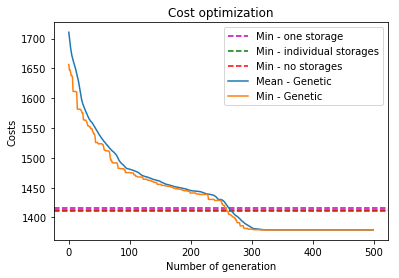

In [ ]:
plt.axhline(min_cost_one_storage,c='m',linestyle='dashed',label='Min - one storage')
plt.axhline(min_cost_all_storages,c='g',linestyle='dashed',label='Min - individual storages')
plt.axhline(cost_wo_storage,label='Min - no storages',linestyle='dashed',c='r')
plt.plot(mean_costs,label='Mean - Genetic')
plt.plot(min_costs,label='Min - Genetic')
plt.xlabel('Number of generation')
plt.ylabel('Costs')
plt.title('Cost optimization')
plt.legend(loc=1)
plt.savefig('plots/genetic_optimization.png',dpi=200)
plt.show()

We can also plot the defined connection distance in the system, for every generation.

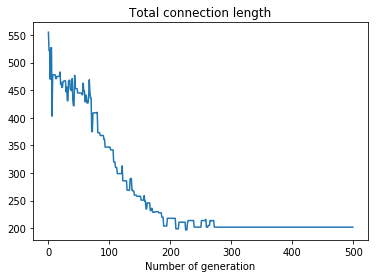

In [ ]:
plt.plot(total_connections)
plt.xlabel('Number of generation')
plt.title('Total connection length')
plt.savefig('plots/genetic_optimization_distance.png',dpi=200)
plt.show()

## Artificial storage optimization

In [ ]:
df_cons['Unnamed: 0'] = pd.to_datetime(df_cons['Unnamed: 0'])
df_cons = df_cons.set_index('Unnamed: 0')
df_cons_red = df_cons.iloc[:,0]
df_prod = pd.read_csv('data/generation_ausgrid.csv')
df_prod['Unnamed: 0'] = pd.to_datetime(df_prod['Unnamed: 0'])
df_prod = df_prod.set_index('Unnamed: 0')

used_houses = [24, 30, 28, 8, 3, 33, 5, 21, 39, 11, 15, 17, 2, 36, 38, 6, 25, 16, 1, 32, 13, 10, 29, 20, 19, 22, 26, 18, 27, 14, 9, 31, 12, 0, 23, 37, 34, 4, 7, 35]

week_start = 37
week_end = 39
df_cons = df_cons.iloc[7*48*week_start:7*48*week_end,used_houses]
df_prod = df_prod.iloc[7*48*week_start:7*48*week_end,used_houses]

data_cons = df_cons.values
data_prod = df_prod.values

In [ ]:
# Create grid model
g = Grid(num_houses=df_cons.shape[1],
         num_storages=df_cons.shape[1],
         max_capacity=0,
         num_pvtypes=df_prod.shape[1],
         pv_peakpower=0)
# Add each pv type to each house
for i in range(df_cons.shape[1]):
    g.change_pvtype(num_house=i,pv_type=i)

# Set the costs for 2 weeks
amortization_timeframe = 7*365 # in days
storage_cost_per_kWh = 500
storage_cost_per_kWh_per_day = storage_cost_per_kWh / amortization_timeframe
cost_per_wire = 0 # Assume wires are already there
loss_per_unit = 0.05 # 5% of power lost, when transferring to direct neighbor
g.set_costs(cost_storage_kwh=14*storage_cost_per_kWh_per_day,loss_per_unit=loss_per_unit)
g_initial = g.get_copy()
# Simulate the grid
res_dict_wo_storage = g.simulate(data_cons=data_cons,data_prod=data_prod)
print(res_dict_wo_storage)

In [ ]:
def objective_function(res_dict):
    return res_dict['cost_import_grid'] + res_dict['setup_cost_storage'] - res_dict['reward_export_grid']

# Calculate the cost of the above simulation
cost_wo_storage = objective_function(res_dict_wo_storage)
print('Cost without storage: ' + str(cost_wo_storage))

In [ ]:
# Capacities to simulate
caps = np.linspace(0,5,20,dtype=float)

population_size = 100
population = []

# Create grid model
g = Grid(num_houses=df_cons.shape[1],
         num_storages=5,
         max_capacity=5,
         num_pvtypes=df_prod.shape[1],
         pv_peakpower=0)
# Add each pv type to each house
for i in range(df_cons.shape[1]):
    g.change_pvtype(num_house=i,pv_type=i)
g.set_costs(cost_storage_kwh=14*storage_cost_per_kWh_per_day,loss_per_unit=loss_per_unit)

# Initialize population
for i in range(population_size):
    g_copy = g.get_copy()
    g_copy.randomize(pv_types=False)
    population.append(g_copy)

# Calculate the objective function for each individual 
def get_cost(individual):
    return objective_function(individual.simulate(data_cons,data_prod))
# Calculate costs of all individuals
pool = multiprocessing.Pool(100)
costs_population = pool.map(get_cost,population)

print('Initialized population')

We implement a genetic algorithm, to search for this optimal solution within the large state space. The parameters we can change are the number of storages, their sizes and the connection of the houses to the storages.

The genetic algorithm needs no certain probabilities that will change the setup of the grid system. Mutation and crossover probabilities two properties and storage connections and storage capacity.

In [ ]:
# Probabilities
prob_mut_connection = 0.25
prob_mut_capacity = 0.25
prob_cross_connection = 0.25
prob_cross_capacity = 0.25
perc_clone_best = 0

# possible capacities
possible_caps = np.linspace(0,5,20)

# Other properties of the GA
num_generations = 300

# Mean, min and total number of connections
mean_costs = np.zeros(num_generations)
min_costs = np.zeros(num_generations)
total_connections = np.zeros(num_generations)
# Progressbar print
print('|{}|'.format(' ' * (num_generations - 2)))
# Loop through generations
for i in range(num_generations):
    # Update progress bar
    print('*',end='',flush=True)
    # Create mutations for connections
    idx = random.sample(list(np.arange(population_size)),int(prob_mut_connection*population_size))
    for k in idx:
        g_copy = population[k].get_copy()
        g_copy.mutate(num_house=-1,storage_connection=True)
        population.append(g_copy)
    # Create mutations for capacities
    idx = random.sample(list(np.arange(population_size)),int(prob_mut_capacity*population_size))
    for k in idx:
        g_copy = population[k].get_copy()
        g_copy.mutate(num_house=-1,storage_sizes=True,storage_cap_list=possible_caps)
        population.append(g_copy)
    # Create crossovers for connection
    idx1 = random.sample(list(np.arange(population_size)),int(prob_cross_connection/2*population_size))
    idx2 = random.sample(list(np.arange(population_size)),int(prob_cross_connection/2*population_size))
    for j,k in zip(idx1,idx2):
        g_copy = population[j].get_copy()
        g_copy2 = population[k].get_copy()
        g_copy2 = g_copy.crossover(g_copy2,storage_connection=True)
        population.append(g_copy)
        population.append(g_copy2)
    # Create crossovers for capacity
    idx1 = random.sample(list(np.arange(population_size)),int(prob_cross_capacity/2*population_size))
    idx2 = random.sample(list(np.arange(population_size)),int(prob_cross_capacity/2*population_size))
    for j,k in zip(idx1,idx2):
        g_copy = population[j].get_copy()
        g_copy2 = g_copy.crossover(population[k],storage_sizes=True)
        population.append(g_copy)
        population.append(g_copy2)
    
    # Calculate objective functions of the new populations
    new_costs = pool.map(get_cost,population[population_size:])
    costs_population = np.append(costs_population,new_costs)
    
    # Cloning the best ones
    sort_idx = np.argsort(costs_population)
    clone_idx = sort_idx[:int(perc_clone_best)*population_size]
    for k in clone_idx:
        g_copy = population[k].get_copy()
        population.append(g_copy)
        costs_population = np.append(costs_population,[costs_population[k]])

    # Get the sorting indices
    sort_idx = np.argsort(costs_population)
    del_idx = sort_idx[population_size:]
    # Remove the individuals with too high costs
    for index in sorted(del_idx, reverse=True):
        del population[index]
    # Remove their costs from the population costs
    costs_population = np.delete(costs_population,del_idx)
    
    
    mean_costs[i] = np.mean(costs_population)
    min_costs[i] = np.min(costs_population)
    total_connections[i] = population[np.argmin(costs_population)].get_total_distance()

## Evoultion of the costs and compare to the boundary cases 

In [ ]:
plt.axhline(cost_wo_storage,label='Min - no storages',linestyle='dashed',c='r')
plt.axhline(1411.420079560202,label='Min - individual storages',linestyle='dashed',c='g')
plt.plot(mean_costs,label='Mean - Genetic')
plt.plot(min_costs,label='Min - Genetic')
plt.xlabel('Number of generation')
plt.ylabel('Costs')
plt.title('Cost optimization')
plt.legend(loc=1)
plt.savefig('plots/artificial_ga.png',dpi=200)
plt.show()

In [ ]:
plt.plot(total_connections)
plt.xlabel('Number of generation')
plt.title('Total connection length')
plt.savefig('plots/genetic_optimization_distance.png',dpi=200)
plt.show()

### Import datasets
We only choose a single house here for the consumption. For the production by the pv panels we choose one from the data set. We then scale its size and assume that the production increases linear with the size.

In [ ]:
# Retrieve data from consumption
data_consumption = df_cons_red.values

# Retrieve data from production and pv_sizes
data_production = df_prod.values
pv_peakpowers = [float(key) for key in df_prod.keys()]

# PV size optimization
This notebook optimizes the size of the pv modules for each house, such that it has an optimal size of the pv module. Optimal is in this case that the cost over a specific time period minimizes. Therefore we consider a finite timespan. We simulate a single year and then multiply the import costs from the grid and rewards, that we get from the grid company, by the number of years.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.grid import Grid
import random
from ipywidgets import IntProgress
from IPython.display import display
%matplotlib inline

In [ ]:
# Retrieve data from consumption
data_consumption = df_cons_red.values

# Retrieve data from production and pv_sizes
data_production = df_prod.values
pv_peakpowers = [float(key) for key in df_prod.keys()]

## Single Household
### Create a grid model 
This creates a standard grid model, which does not include any storage device (i.e. one storage with zero capacity). Therefore we get the pure consumption data and the price for this consumption. 

In [ ]:
g = Grid(num_houses=1,num_storages=1,max_capacity=0,num_pvtypes=len(pv_peakpowers),pv_peakpower=pv_peakpowers)
g.set_costs() # Set standard costs
res_dict = g.simulate(data_cons=data_consumption,data_prod=data_production)
print(res_dict)

{'import_grid_kwh': 7679.200999999989, 'export_grid_kwh': 0.0, 'pv_production_kwh': 0.0, 'setup_cost_storage': 0, 'setup_cost_pv': 0.0, 'cost_import_grid': 1919.8002499999973, 'reward_export_grid': 0.0}


###  Objective function 
We now need to define an objective function, that we want to optimize. As outlined before we want to optimize here the cost within a certain time frame (e.g. 7 years). Setting up storages and PV systems are one time expenses, so we just leave them as they result from the model simulation. However the costs and reward from grid interactions are only valid for a single year. Hence we multiply them by the number of years, which we look at, to get an approximation for the total costs.
We can also think of completly different objective functions, such as minimizing the interaction with the grid. Or combinations of costs and grid dependency factors.

In [ ]:
def objective_function(res_dict,years=7):
    total_cost = res_dict["setup_cost_storage"] + res_dict["setup_cost_pv"]
    total_cost += res_dict["cost_import_grid"]*years
    total_cost -= res_dict["reward_export_grid"]*years
    return total_cost

Applying the objective function to the model without a PV installation, gives us simply the normal cost for energy in the house over the defined timespan.

In [ ]:
total_cost_noPV = objective_function(res_dict)
print(total_cost_noPV)

13438.601749999982


Applying the objective function now to the grid model for all possible PV types gives us a "cost-landscape".


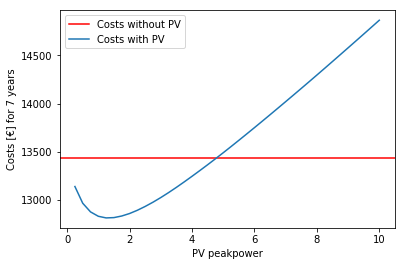

In [ ]:
total_costs = []
# For all possible PV types
for i in range(data_production.shape[1]):
    # Set pv type of house to this specific one
    g.change_pvtype(num_house=0,pv_type=i)
    # Simulate the grid for one year
    res_dict = g.simulate(data_cons=data_consumption,data_prod=data_production)
    # Objective function
    total_costs.append(objective_function(res_dict))
    
# Plot the total costs agains the peakpower of the used module
plt.axhline(total_cost_noPV,c='r',label='Costs without PV')
plt.xlabel('PV peakpower')
plt.ylabel('Costs [€] for 7 years')
plt.plot(pv_peakpowers,total_costs,label='Costs with PV')
plt.legend()
plt.savefig('plots/single_household_7year.png',dpi=200)

## Single Household 

### Single household - no PV - no storage
For simplicity we will first consider one house with no storage and no pv installed. Thus this is the basic example of a single household connected to the powergrid and should just return the basic electricity usage, i.e. 
consumption in kWh. We choose the dataset of the AUSGRID company, which provides a full year of data.

In [ ]:
# Reduce the dataset to example described above
df_cons_red = df_cons.iloc[:,100] # Take only consumption of house 100
df_prod_red = pd.DataFrame() # Empty 
# Convert to numpy arrays for Grid.simulate()
data_cons_red = df_cons_red.values
data_prod_red = df_prod_red.values

In [ ]:
g_nopv = Grid(num_houses=1,num_storages=1,max_capacity=0,num_pvtypes=0)
g_nopv.set_costs() # Have to that before running
res_nopv = g_nopv.simulate(data_cons=data_cons_red,data_prod=data_prod_red)
print(res_nopv)

{'import_grid_kwh': 3834.486000000009, 'export_grid_kwh': 0.0, 'pv_production_kwh': 0.0, 'setup_cost_storage': 0, 'setup_cost_pv': 0.0, 'cost_import_grid': 958.6215000000022, 'reward_export_grid': 0.0}



### Single household - with PV - no storage


In [ ]:
df_cons_red = df_cons.iloc[:,100] # choose house 100
df_prod_red = df_prod['100'] # choose pv panel of house 100
# Conversion to numpy arrays
data_cons_red = df_cons_red.values
data_prod_red = df_prod_red.values

# Setting up a model for this task and simulate it
g_pv = Grid(num_houses=1,num_storages=1,max_capacity=0,num_pvtypes=1)
g_pv.set_costs()
g_pv.change_pvtype(num_house=0,pv_type=0)
res_pv = g_pv.simulate(data_cons=data_cons_red,data_prod=data_prod_red)
print(res_pv)

{'import_grid_kwh': 2884.7030000000086, 'export_grid_kwh': 865.9189999999977, 'pv_production_kwh': 1815.7020000000166, 'setup_cost_storage': 0, 'setup_cost_pv': 1400.0, 'cost_import_grid': 721.1757500000022, 'reward_export_grid': 86.59189999999978}


In [ ]:
round(res_pv['import_grid_kwh'] + res_pv['pv_production_kwh'] - res_pv['export_grid_kwh']) == round(res_nopv['import_grid_kwh'])

True

### Single household - PV - storage


In [ ]:
g_pv_storage = Grid(num_houses=1,num_storages=1,max_capacity=13.5,num_pvtypes=1)
g_pv_storage.set_costs()
g_pv_storage.change_pvtype(num_house=0,pv_type=0)
res_pv_storage = g_pv_storage.simulate(data_cons=data_cons_red,data_prod=data_prod_red)
print(res_pv_storage)

{'import_grid_kwh': 2039.033999999996, 'export_grid_kwh': 20.250000000000014, 'pv_production_kwh': 1815.7020000000166, 'setup_cost_storage': 6750.0, 'setup_cost_pv': 1400.0, 'cost_import_grid': 509.758499999999, 'reward_export_grid': 2.0250000000000017}



## Multiple households

In [ ]:
# Choose number of houses houses
num_houses = 5
data_consumption = df_cons.iloc[:,:num_houses].values

# Retrieve data from production and pv_sizes
df_prod = df_prod.iloc[:,0:20]
data_production = df_prod.values
pv_peakpowers = [float(key) for key in df_prod.keys()]

# Create the grid model and simulate one year
g = Grid(num_houses=num_houses,num_storages=1,max_capacity=0,num_pvtypes=len(pv_peakpowers),pv_peakpower=pv_peakpowers)
# Set standard costs
g.set_costs()

In [ ]:
g.randomize()
res_dict = g.simulate(data_cons=data_consumption,data_prod=data_production)
print(res_dict)

{'import_grid_kwh': 22405.888250000233, 'export_grid_kwh': 11918.947249999948, 'pv_production_kwh': 15951.254999999815, 'setup_cost_storage': 0, 'setup_cost_pv': 14350.0, 'cost_import_grid': 5601.472062500058, 'reward_export_grid': 1191.8947249999949}


In [ ]:
num_population = 100
population = []
total_costs = np.array([])
for i in range(num_population):
    # Create Grid, set costs, randomize and simulate
    g = Grid(num_houses=num_houses,num_storages=1,max_capacity=0,num_pvtypes=len(pv_peakpowers),pv_peakpower=pv_peakpowers)
    g.set_costs()
    g.randomize()
    res_dict = g.simulate(data_consumption,data_production)
    # Append grid to population and total costs to array
    population.append(g)
    total_costs = np.append(total_costs,objective_function(res_dict)) 

In [ ]:
# Rates of crossover and mutation
mutation_rate = 0.5
crossover_rate = 0.5

# Storage arrays
num_generations = 20
mean_total_costs = np.zeros(num_generations)
std_total_costs = np.zeros(num_generations)
min_total_costs = np.zeros(num_generations)

# Progress bar
f = IntProgress(min=0, max=num_generations-1) # instantiate the bar
display(f) # display the bar

for i in range(num_generations): 
    # Mutations
    for k in range(int(mutation_rate*num_population)): 
        idx = random.randint(0,len(population)-1)
        g = population[idx].get_copy()
        g.mutate(storage_connection=False,pv_type=True)
        res_dict = g.simulate(data_consumption,data_production)
        population.append(g)
        total_costs = np.append(total_costs,objective_function(res_dict))
    
    # Crossover
    for k in range(int(crossover_rate*num_population)):
        idx1 = random.randint(0,len(population)-1)
        idx2 = random.randint(0,len(population)-1)
        g1 = population[idx1].get_copy()
        g2 = population[idx2].get_copy()
        g2 = g1.crossover(g2,storage_connection=False,pv_type=True)
        population.append(g1)
        population.append(g2)
        res_dict = g1.simulate(data_consumption,data_production)
        total_costs = np.append(total_costs,objective_function(res_dict))
        res_dict = g2.simulate(data_consumption,data_production)
        total_costs = np.append(total_costs,objective_function(res_dict))
        
    # Size reduction
    del_idx = np.argsort(total_costs)[num_population:]
    for idx in sorted(del_idx,reverse=True):
        population.pop(idx)
    total_costs = np.delete(total_costs,del_idx)
    
    # Calculate mean and min total costs
    mean_total_costs[i] = np.mean(total_costs)
    std_total_costs[i] = np.std(total_costs)
    min_total_costs[i] = np.min(total_costs)
    
    # Update value of the proress bar
    f.value = i

# Store the best grid individual
best_grid = population[np.argmin(total_costs)]
min_cost_genetic = np.min(min_total_costs)

IntProgress(value=0, max=20)

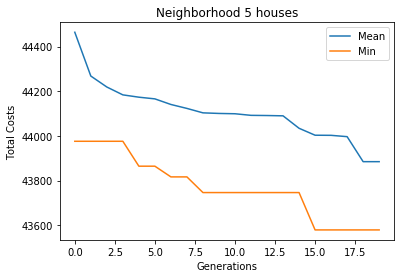

In [ ]:
plt.ylabel('Total Costs')
plt.xlabel('Generations')
plt.plot(mean_total_costs,label='Mean')
plt.plot(min_total_costs,label='Min')
plt.title('Neighborhood ' + str(num_houses) + ' houses')
plt.legend()
plt.savefig('plots/' + str(num_houses) + '_household_onlyPV.png')

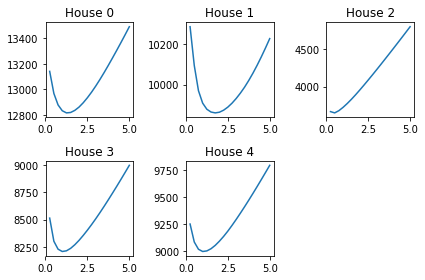

Minimum cost: 43534.36377500013
Genetic algorithm minimum: 43579.274812500225


In [ ]:
min_sum = 0

for l in range(num_houses):
    data_consumption = df_cons.iloc[:,l].values
    g = Grid(num_houses=1,num_storages=1,max_capacity=0,num_pvtypes=len(pv_peakpowers),pv_peakpower=pv_peakpowers)
    g.set_costs()
    total_costs = []
    # For all possible PV types
    for i in range(data_production.shape[1]):
        # Set pv type of house to this specific one
        g.change_pvtype(num_house=0,pv_type=i)
        # Simulate the grid for one year
        res_dict = g.simulate(data_cons=data_consumption,data_prod=data_production)
        # Objective function
        total_costs.append(objective_function(res_dict))
    plt.subplot(2,3,l+1)
    plt.plot(pv_peakpowers,total_costs)
    plt.title('House ' + str(l))
    min_sum += np.min(total_costs)
plt.tight_layout()
plt.show()
print('Minimum cost: ' + str(min_sum))
print('Genetic algorithm minimum: ' + str(min_cost_genetic))